In [217]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')

from hamiltonian import *
from misc import *
from haldane_pseudopotential import *
from plotting import *

In [218]:
#simulation parameters
#for MR_Pf state, v=5/2 and S=3
#N_phi=2(N_e)-3 for LL=2
N = 10
filling_factor_inv = 2
top_shift=3
Nphi = filling_factor_inv*N-top_shift

system = system(N, Nphi,0, L2=False)

========Initializing possible states in spherical geometry========
completed in 0.07533478736877441 seconds
N = 10 electrons
Nphi = 17 flux quanta



In [219]:
d_vals = np.arange(0,10,0.5)
d_vals[0] = 0.001

V_m = []

for d in d_vals: 
    pp = haldane_pseudopotential(l = system.Q, 
                                LLn = 1,
                                width = d,
                                custom = None,
                                interaction = False)
    
    V_m.append(list(pp.V[1::2][0:6]))

========Initializing two-body pseudopotential========
completed in 0.08975005149841309 seconds
pseudopotential: [1.80985001 1.43491875 1.37944029 1.11985228 0.96669161 0.85872028
 0.7771593  0.71316893 0.66181709 0.6200705  0.58594063 0.55806529
 0.5354832  0.51750386 0.50362866 0.4935015  0.48687734 0.48360236]  with finite width: 0.001

========Initializing two-body pseudopotential========
completed in 0.08084297180175781 seconds
pseudopotential: [1.61269446 1.35537492 1.27755735 1.10375025 0.98642256 0.90017488
 0.8335591  0.78054241 0.73756599 0.70236536 0.67342113 0.64967475
 0.63036961 0.61495682 0.60303706 0.59432343 0.58861766 0.58579493]  with finite width: 0.5

========Initializing two-body pseudopotential========
completed in 0.07861995697021484 seconds
pseudopotential: [1.46513197 1.28515692 1.20751552 1.08675436 0.99745261 0.92929827
 0.87552406 0.83212109 0.7965817  0.7672518  0.7429939  0.7230012
 0.70668913 0.69362919 0.6835071  0.67609569 0.67123722 0.6688321 ]  with f

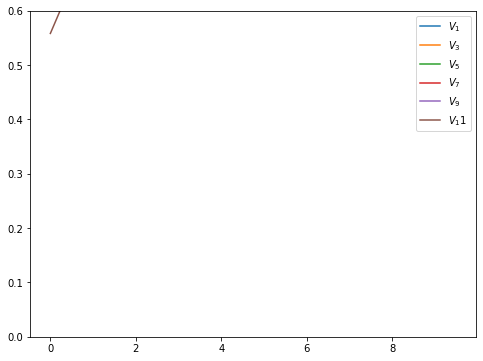

In [222]:
V_m = np.asarray(V_m)
index=np.arange(1,12,2)

plt.subplots(figsize=(8,6))
for i in range(0,6):
    plt.plot(d_vals,V_m[:,i],label=rf'$V_{index[i]}$')

plt.ylim(0,0.6)
plt.legend()
plt.show()

In [223]:
V_m

array([[1.43491875, 1.11985228, 0.85872028, 0.71316893, 0.6200705 ,
        0.55806529],
       [1.35537492, 1.10375025, 0.90017488, 0.78054241, 0.70236536,
        0.64967475],
       [1.28515692, 1.08675436, 0.92929827, 0.83212109, 0.7672518 ,
        0.7230012 ],
       [1.22625653, 1.07117262, 0.94975229, 0.87149603, 0.81817935,
        0.78137692],
       [1.17822303, 1.05772634, 0.96415977, 0.90155538, 0.85807755,
        0.82772287],
       [1.13972158, 1.04647708, 0.9743429 , 0.92451315, 0.88928976,
        0.86443086],
       [1.10919653, 1.03722971, 0.98156658, 0.94205983, 0.91367921,
        0.89344546],
       [1.08516635, 1.02970965, 0.98670993, 0.95548305, 0.93272046,
        0.91633827],
       [1.06633669, 1.02363807, 0.99038549, 0.96576237, 0.94757612,
        0.93437302],
       [1.05162692, 1.0187612 , 0.99302153, 0.97364264, 0.95916016,
        0.94856155],
       [1.04015846, 1.01485942, 0.99491857, 0.97969039, 0.96818945,
        0.95971105],
       [1.03122852, 1

<ipython-input-155-d9d61585bbda>:5: RuntimeWarning: divide by zero encountered in divide
  V_c=1/k


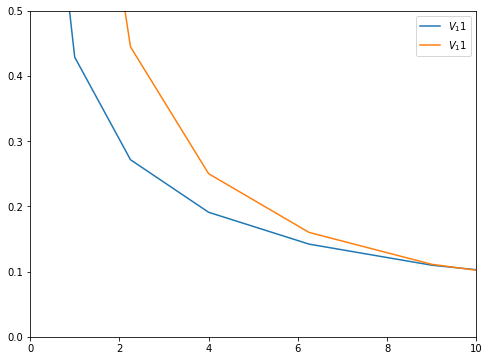

In [155]:
d_vals = np.arange(0,10,0.5)
d_vals[0] = 0.001

k=np.arange(0,10,0.5)
V_c=1/k

plt.subplots(figsize=(8,6))

plt.plot(d_vals*k,V_m[:,0]/d_vals,label=rf'$V_{index[i]}$')
plt.plot(d_vals*k,V_c/d_vals,label=rf'$V_{index[i]}$')

plt.ylim(0,0.5)
plt.xlim(0,10)
plt.legend()

In [162]:
def finite_width_vsq(k,d):
    
    numerator=3*k*d + 8*np.pi**2/(k*d) - 32*np.pi**4*(1 - np.exp(-k*d))/((k*d)**2* ((k*d)**2 + 4*np.pi**2))
    denominator = (k*d)**2 + 4*np.pi**2
    
    return numerator/(k*denominator)

In [163]:
w=np.arange(0.1,10,0.5)
for w in w:
    print(finite_width_vsq(np.sqrt(system.get_ell()),d=w))

0.2889539701641464
0.21479644468108763
0.16722241490672043
0.13507757288625197
0.1123632719725514
0.09568782390692832
0.0830425952535644
0.07318668993958068
0.06532371573725249
0.05892480123048289
0.053627868400077834
0.0491782159344026
0.04539229849437205
0.042134971576478206
0.03930479784992764
0.03682431858113056
0.03463346389042299
0.032684995420698165
0.03094129426169962
0.02937205746491876
